In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio as iio
import cv2

In [31]:
#Pega o nome da imagem de teste
filename = str(input())
path = 'Braile Dataset\\' + filename

#Abre a imagem
img_src = iio.imread(path)

Silence.png


# Pré-Processamento
Nessa etapa vamos pegar a imagem lida na celula anterior, deixa-la cinza e binarizar a imagem


In [32]:
#Filtro default que estamos usando, reduz o barulho bem
def meanFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            img[i, j] = img_pad[i: i + filter_size,j: j + filter_size].sum()/img_pad[i: i + filter_size,j : j + filter_size].size 
            
    return img

In [33]:
# Normalização min max
def min_max(img):
    min = np.amin(img)
    max = np.amax(img)
    
    if (max - min > 0): 
        img_res = (img - min)/(max - min)
    else : 
        img_res = img 
    
    return img_res;

In [34]:
#Transforma a imagem em gray-scale
def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = min_max(new_img)
    
    return new_img

In [35]:
#Binariza, deixa o fundo preto e os circulos brancos, para a operação FindK
def Binarize(img, T):
    return np.where(img > T, 0, 1);

In [36]:
# Transforma em uma representação 3x2 onde 1 é um ponto de braile e 0 nada.
def Discretize(img):
    
    x = img.shape[0]
    y = img.shape[1]
    
    stepx = x// 3
    stepy = y// 2
    
    img_discrete = np.zeros((6, 1))
    
    img_cut = []
    
    #Corta a imagem em 6
    for i in range(0, x, stepx):
        for j in range(0, y, stepy):
            img_cut.append(img[i : i + stepx, j : j + stepy])

    for i in range(6):
        if(img_cut[i].sum() > 0):
            img_discrete[i] = 1;
  
    return img_discrete;

In [37]:
# Essa função pega a imagem da letra, pré-processa as letras(Normaliza, Reduz ruido, tira cores, Binariza)
# e em seguida compara com o dicionario (Representação  binaria das letras em braile) e retorna uma letra
def braile_to_text(img_src):
    #Etapa 1 - Carrega o dicionario
    f = open("Dictionay.txt", 'r')
    bin_dictionary = []
    chars = 27

    for i in range(chars):
        bit = f.read(6)

        vet = list(map(np.float32, bit))
        vet = np.reshape(vet, (3,2))
        bin_dictionary.append(vet)
    f.close()
    
    #Deixa a imagem cinza e normaliza para o intervalo de 0 a 255
    img_gray = Luminance(img_src)
    img_gray = min_max(img_gray)
    img_gray = (img_gray*255).astype(np.uint8)
    
    # Usa o filtro para reduzir barulho
    img_filtered = meanFilter(img_gray,5)
    
    #Binariza a imagem
    img_bin = Binarize(img_filtered, 175)
    
    #Pega a imagem binarizada e gera uma imagem 3x2 dizendo onde há ou não uma bolinha
    img_discrete = Discretize(img_bin)

    img_discrete = np.reshape(img_discrete, (3,2))

    #Compara com o dicionario e printa a letras
    for i in range(len(bin_dictionary)):
        if(np.array_equiv(bin_dictionary[i], img_discrete)):
            if(i == 26):
                return chr(32)
            else:
                return chr(i + 97)
        
                
x= img_src.shape[0]
y = img_src.shape[1]

#Gera uma grid para segmentar rusticamente as imagens
row_ele = x // 28
line_ele = y // 28

startx= 0
starty = 0
    
lista = []
    
for i in range(row_ele):
    startx = 0
    starty = 28 * i
    for j in range(line_ele):
        
        img_slice = img_src[starty: starty + 28, startx : startx + 28]
        
        lista.append(braile_to_text(img_slice))
        
        startx = 28 * (j + 1)

string = ""
    
print(string.join(lista))
    

the first silence is described as a hollow or echoiig quiet         


In [38]:
# [a-z] -> Braile
#Abre o dicionario de imagens para realizar a conversão de a-z para binario
def openDictionary():
    dictionary = []
    
    for i in range(26):
        img = iio.imread('SimpleDictionary\\' + chr(97+i)+'.png')
        dictionary.append(img)
    img = iio.imread('SimpleDictionary\\' + 'sapce.png')
    dictionary.append(img)

    return dictionary
    
    
img_dictionary = openDictionary()

In [39]:
text = str(input())

print(text)

the first silence is described as a hollow or echoiig quiet
the first silence is described as a hollow or echoiig quiet


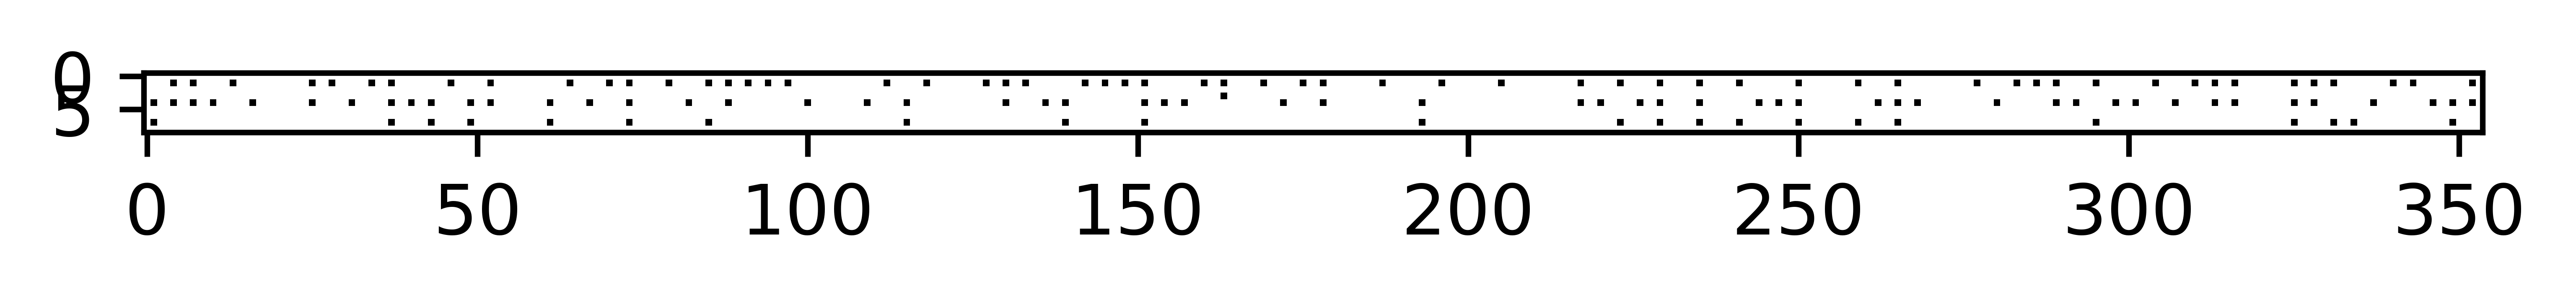

In [40]:
# Executa [a-z] -> Braile
def text_to_braile(text):
    #Converte tudo para letras minusculas
    ltext = text.lower()

    #Para cada letra
    for i in range(len(ltext)):

        val = ord(ltext[i]) #Pega o valor em ascii e determina o index 
        if(val == 32): #Espaço
            index = 26;
        else: #Alfabeto
            index = val - 97;

        braile = img_dictionary[index]

        if (i == 0):
            prev_image = braile 
        else:
            prev_image = cv2.hconcat([prev_image, braile]) #Concatena a imagem
    
    img = prev_image
    
    return img
    
ttb = text_to_braile(text)
    
plt.figure(5, dpi = 1200)

plt.subplot(111)
plt.imshow(ttb, cmap="gray")

the first silence is described as a hollow or echoiig quiet


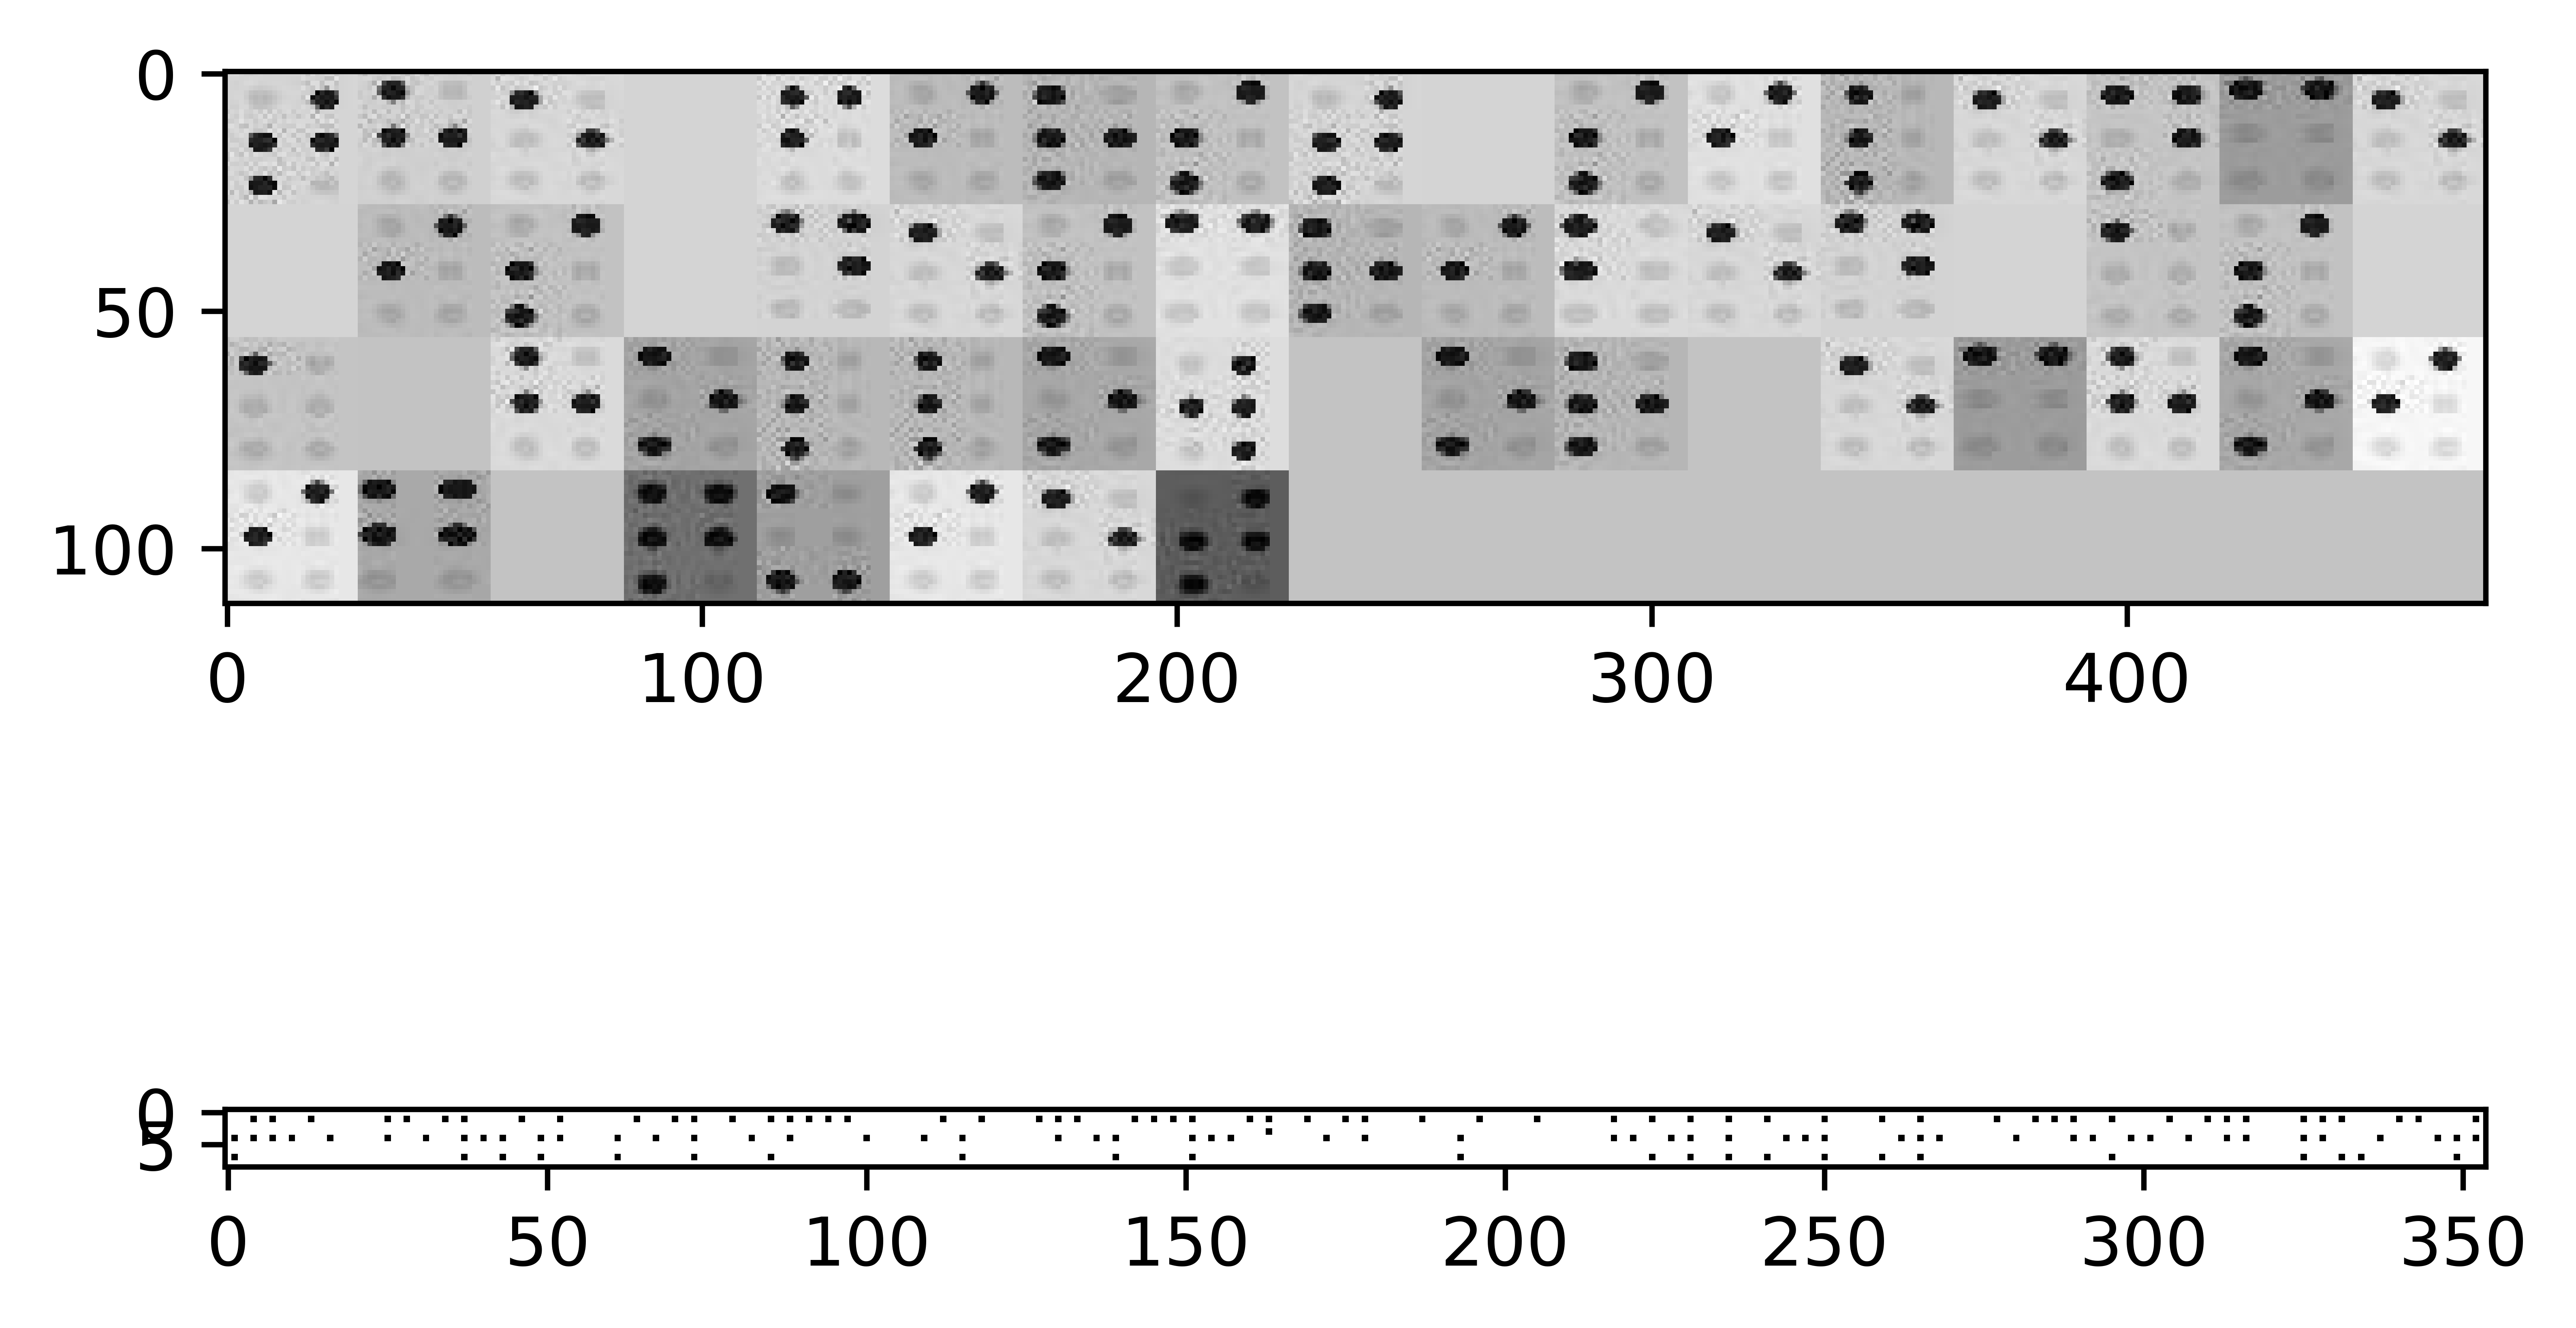

In [28]:
plt.figure(1, dpi = 1200)

plt.subplot(211)
plt.imshow(img_src, cmap="gray")

plt.subplot(212)
plt.imshow(ttb, cmap="gray")

print(text)